##
![brown-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
# Import Library

In [244]:
import os
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.3f}'.format
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

##
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
# Loading Data

In [245]:
stroke = pd.read_csv('data/healthcare-dataset-stroke-data.csv')

##
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
# 1. Data Preprocessing

In [246]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [247]:
stroke.describe(include="object")

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [248]:
stroke['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

The Age columns have a type float64 that mean inside data have a float number rows

In [249]:
stroke[stroke['age']<2]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,Female,1.320,0,0,No,children,Urban,70.370,NaN,Unknown,1
363,7559,Female,0.640,0,0,No,children,Urban,83.820,24.900,Unknown,0
376,22706,Female,0.880,0,0,No,children,Rural,88.110,15.500,Unknown,0
562,45238,Female,1.800,0,0,No,children,Urban,58.260,16.500,Unknown,0
564,61511,Female,0.320,0,0,No,children,Rural,73.710,16.200,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4934,32147,Male,1.320,0,0,No,children,Rural,107.020,NaN,Unknown,0
5032,67426,Female,1.240,0,0,No,children,Rural,61.940,20.300,Unknown,0
5079,42709,Male,1.720,0,0,No,children,Urban,77.280,17.100,Unknown,0
5089,56714,Female,0.720,0,0,No,children,Rural,62.130,16.800,Unknown,0


In [250]:
stroke['age']=stroke['age'].astype(int)
stroke['age']=stroke['age'].replace([0],1)
stroke[stroke['age']<=9]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,Female,1,0,0,No,children,Urban,70.370,NaN,Unknown,1
249,30669,Male,3,0,0,No,children,Rural,95.120,18.000,Unknown,0
251,16523,Female,8,0,0,No,Private,Urban,110.890,17.600,Unknown,0
282,33759,Female,3,0,0,No,children,Urban,73.740,16.000,Unknown,0
291,11014,Male,4,0,0,No,children,Rural,79.170,20.000,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5078,27446,Female,8,0,0,No,children,Urban,76.310,15.500,Unknown,0
5079,42709,Male,1,0,0,No,children,Urban,77.280,17.100,Unknown,0
5089,56714,Female,1,0,0,No,children,Rural,62.130,16.800,Unknown,0
5095,68598,Male,1,0,0,No,children,Rural,79.150,17.400,Unknown,0


  At the smoking_status columns, from 1 to 9 years old, the data set has the value 'Unknown', So I did a search and statistic that in children under 10, the smoking rate seems to be less than <1%
   > [Children and young people use tobacco](https://www.blackpooljsna.org.uk/Home.aspx)



In [251]:
df=stroke[(stroke['age']<=9) & (stroke['smoking_status']=='Unknown')]
df['smoking_status']=df['smoking_status'].replace(['Unknown'],'never smoked')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,Female,1,0,0,No,children,Urban,70.370,NaN,never smoked,1
249,30669,Male,3,0,0,No,children,Rural,95.120,18.000,never smoked,0
251,16523,Female,8,0,0,No,Private,Urban,110.890,17.600,never smoked,0
282,33759,Female,3,0,0,No,children,Urban,73.740,16.000,never smoked,0
291,11014,Male,4,0,0,No,children,Rural,79.170,20.000,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5078,27446,Female,8,0,0,No,children,Urban,76.310,15.500,never smoked,0
5079,42709,Male,1,0,0,No,children,Urban,77.280,17.100,never smoked,0
5089,56714,Female,1,0,0,No,children,Rural,62.130,16.800,never smoked,0
5095,68598,Male,1,0,0,No,children,Rural,79.150,17.400,never smoked,0


In [252]:
df1=stroke[(stroke['age']<=9) & (stroke['smoking_status']!='Unknown')|(stroke['age']>9)]

In [253]:
stroke=pd.concat([df,df1])

In [254]:
stroke.shape

(5110, 12)

In [255]:
stroke[stroke['age']==1]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,Female,1,0,0,No,children,Urban,70.370,NaN,never smoked,1
363,7559,Female,1,0,0,No,children,Urban,83.820,24.900,never smoked,0
376,22706,Female,1,0,0,No,children,Rural,88.110,15.500,never smoked,0
562,45238,Female,1,0,0,No,children,Urban,58.260,16.500,never smoked,0
564,61511,Female,1,0,0,No,children,Rural,73.710,16.200,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4934,32147,Male,1,0,0,No,children,Rural,107.020,NaN,never smoked,0
5032,67426,Female,1,0,0,No,children,Rural,61.940,20.300,never smoked,0
5079,42709,Male,1,0,0,No,children,Urban,77.280,17.100,never smoked,0
5089,56714,Female,1,0,0,No,children,Rural,62.130,16.800,never smoked,0


In [256]:
df = pd.get_dummies(data=df, columns=['smoking_status'])
df = pd.get_dummies(data=df, columns=['work_type'])
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_never smoked,work_type_Private,work_type_Self-employed,work_type_children
162,69768,Female,1,0,0,No,Urban,70.370,NaN,1,1,0,0,1
249,30669,Male,3,0,0,No,Rural,95.120,18.000,0,1,0,0,1
251,16523,Female,8,0,0,No,Urban,110.890,17.600,0,1,1,0,0
282,33759,Female,3,0,0,No,Urban,73.740,16.000,0,1,0,0,1
291,11014,Male,4,0,0,No,Rural,79.170,20.000,0,1,0,0,1


The column BMI is missing data, so i need to solve this problem

In [257]:
stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

At this data, we have 201/5110 percent for missing data at BMI column. its approximate 4% data, so i think the best way is filling missing values by mean

In [258]:
null_df = stroke[stroke['bmi'].isnull()]
# type(null_df['bmi'])

In [259]:
mean=stroke['bmi'].mean(skipna=True)
stroke['bmi']=stroke['bmi'].mask(stroke['bmi'].isnull(),mean)

In [260]:
stroke.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#### Show all unique classes

In [261]:
for col in stroke.columns:
    if(stroke.dtypes[col]=='O'):
        print('-----------------------\n',stroke[col].value_counts())

-----------------------
 Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
-----------------------
 Yes    3353
No     1757
Name: ever_married, dtype: int64
-----------------------
 Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
-----------------------
 Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
-----------------------
 never smoked       2364
Unknown            1072
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


#### Drop the Unsual from the data

In [262]:
stroke=stroke.drop(columns='id',axis=1)

In [263]:
stroke.drop(stroke.loc[stroke['smoking_status']=='Unknown'].index, inplace=True)
stroke.shape

(4038, 11)

In [264]:
stroke = stroke[stroke['gender']!='Other']

In [265]:
stroke=stroke.reset_index(drop=True)

In [266]:
stroke_Final=stroke.copy()

#### Encoding Categorical Features

In [267]:
stroke["Residence_type"] = stroke["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
stroke["ever_married"] = stroke["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)
stroke["gender"] = stroke["gender"].apply(lambda x: 1 if x=="Male" else 0)

In [268]:
stroke = pd.get_dummies(data=stroke, columns=['smoking_status'])
stroke = pd.get_dummies(data=stroke, columns=['work_type'])

In [269]:
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,0,1,0,0,0,1,70.370,28.893,1,0,1,0,0,0,0,0,1
1,1,3,0,0,0,0,95.120,18.000,0,0,1,0,0,0,0,0,1
2,0,8,0,0,0,1,110.890,17.600,0,0,1,0,0,0,1,0,0
3,0,3,0,0,0,1,73.740,16.000,0,0,1,0,0,0,0,0,1
4,1,4,0,0,0,0,79.170,20.000,0,0,1,0,0,0,0,0,1


In [270]:
stroke_Final.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,1,0,0,No,children,Urban,70.370,28.893,never smoked,1
1,Male,3,0,0,No,children,Rural,95.120,18.000,never smoked,0
2,Female,8,0,0,No,Private,Urban,110.890,17.600,never smoked,0
3,Female,3,0,0,No,children,Urban,73.740,16.000,never smoked,0
4,Male,4,0,0,No,children,Rural,79.170,20.000,never smoked,0


##
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
# 2. Visualization

### Count stroke

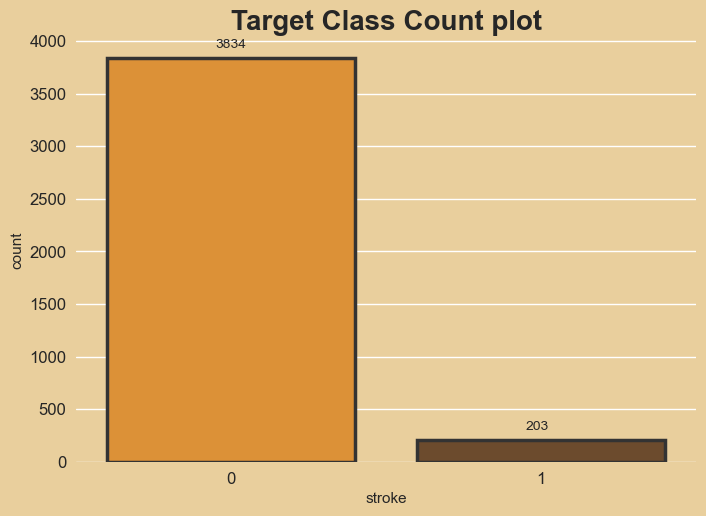

In [271]:
plt.figure(facecolor='#E9CF9D')
ax = sns.countplot(data=stroke_Final, x='stroke', edgecolor='0.2', lw=2.5,  palette=["#F7941C", "#764A23"])
ax.set_facecolor('#E9CF9D')
[ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+100)) for p in ax.patches]
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.title('Target Class Count plot', fontsize=20, fontweight='bold')
plt.tick_params(axis='both', labelsize=12)
plt.savefig('target_class_count_plot.png', bbox_inches='tight')
plt.show()

The data is imbalance, because there are only 203 rows of data that have a stroke, and the rest are 4907 rows of data that do not have a stroke.

### Age Distribution

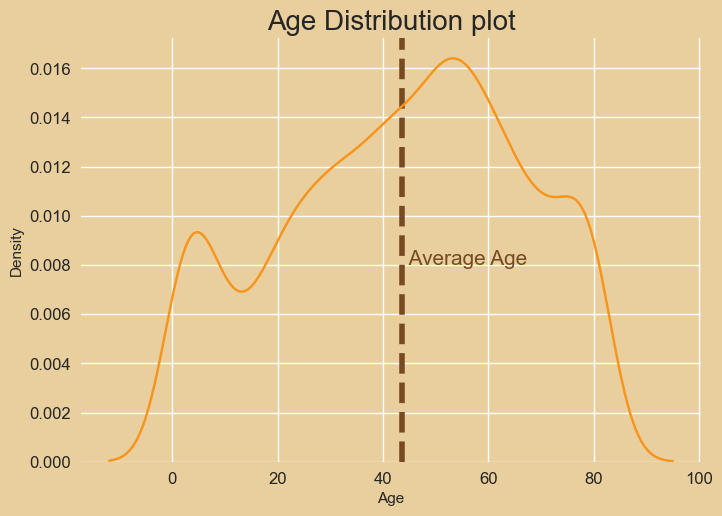

In [272]:
plt.figure(facecolor='#E9CF9D')
ax = sns.kdeplot(stroke_Final['age'], color='lightgray')
ax.set_facecolor('#E9CF9D')
ax.lines[0].set_color('#F7941C')
plt.axvline(stroke_Final['age'].mean(), linestyle='--', lw=4, zorder=1, color='#764A23')
plt.annotate(f' Average Age', (44, 0.008), fontsize=15,color='#764A23')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Age Distribution plot', fontsize=20)
plt.tick_params(axis='both', labelsize=12)
plt.xlabel('Age')
plt.savefig('age_distribution_plot.png', bbox_inches='tight')
plt.show()

The average age is nearly 42 years old, and the age range is from 0 to 82 years old.

### Gender

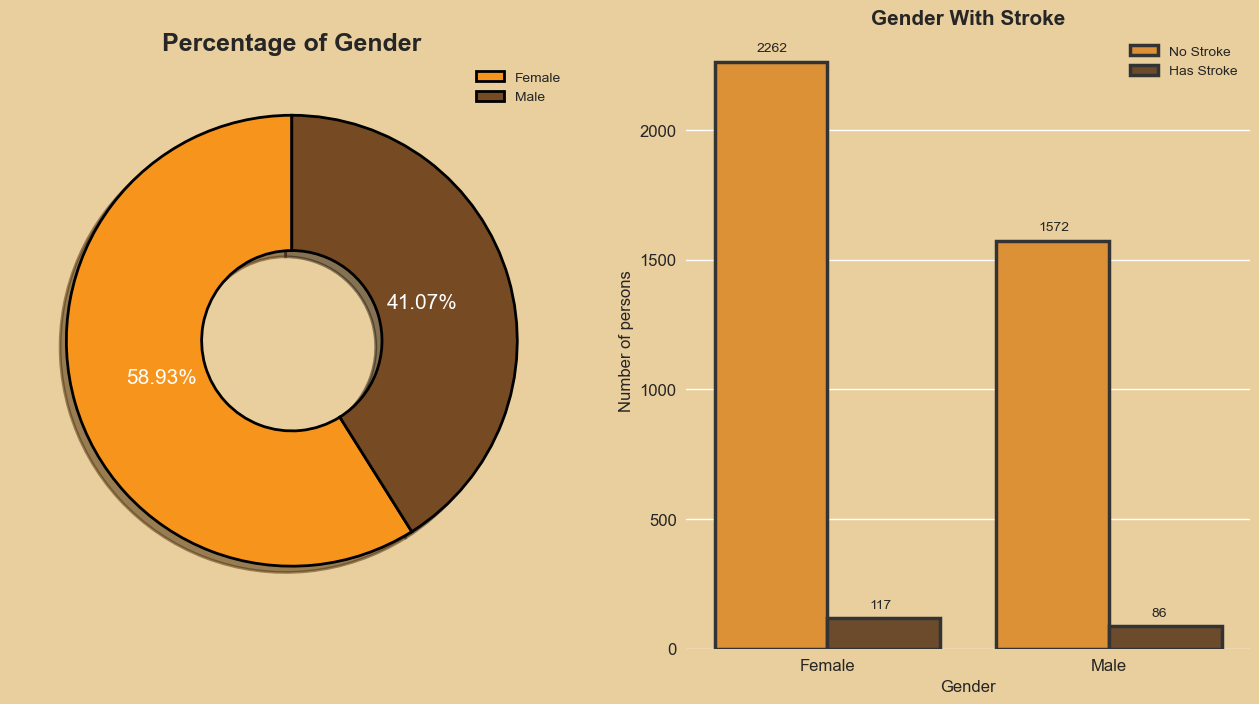

In [273]:
fig, axs = plt.subplots(1, 2, figsize = (16,8), facecolor='#E9CF9D')
labels = [ 'Female','Male']
axs[0].pie(stroke_Final["gender"].value_counts(),autopct='%1.2f%%',labels=labels, radius =1, 
           colors=["#F7941C", "#764A23"], shadow = True, startangle = 90, labeldistance=None,
           wedgeprops = {"edgecolor" : "black",
                         'linewidth': 2,
                         'antialiased': True,
                         "width":0.6}, textprops = {"fontsize":15, "color":"white"})
axs[0].set_title("Percentage of Gender",fontsize=18,fontweight="bold")
axs[0].set_facecolor('#E9CF9D')
axs[0].legend()
axs[0].tick_params(axis='both', which='major', labelsize=12)

axs[1] = sns.countplot(x='gender', data=stroke_Final, hue =stroke_Final['stroke'], edgecolor='0.2', lw=2.5,  
                       palette=["#F7941C", "#764A23"])
[axs[1].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+40)) for p in axs[1].patches]
axs[1].set_title("Gender With Stroke",fontsize=15,fontweight="bold")
axs[1].set_xlabel('Gender',fontsize=12)
axs[1].set_ylabel('Number of persons',fontsize=12)
axs[1].legend(['No Stroke','Has Stroke'])
axs[1].set_facecolor('#E9CF9D')
axs[1].tick_params(axis='both', which='major', labelsize=12)
plt.savefig('gender_stroke.png', bbox_inches='tight')
plt.show()

There's not much different about the stroke ratio of each gender.

### BOXPLOT with three feature AGE, BMI , AVG_GLUTCOSE_LEVEL

In [274]:
Have_stroke=stroke_Final[stroke_Final['stroke']==1]
Non_stroke=stroke_Final[stroke_Final['stroke']==0]

In [275]:
stroke_Final["index"]= range(1, len(stroke_Final) + 1)
Have_stroke["index"]= range(1, len(Have_stroke) + 1)
Non_stroke["index"]= range(1, len(Non_stroke) + 1)

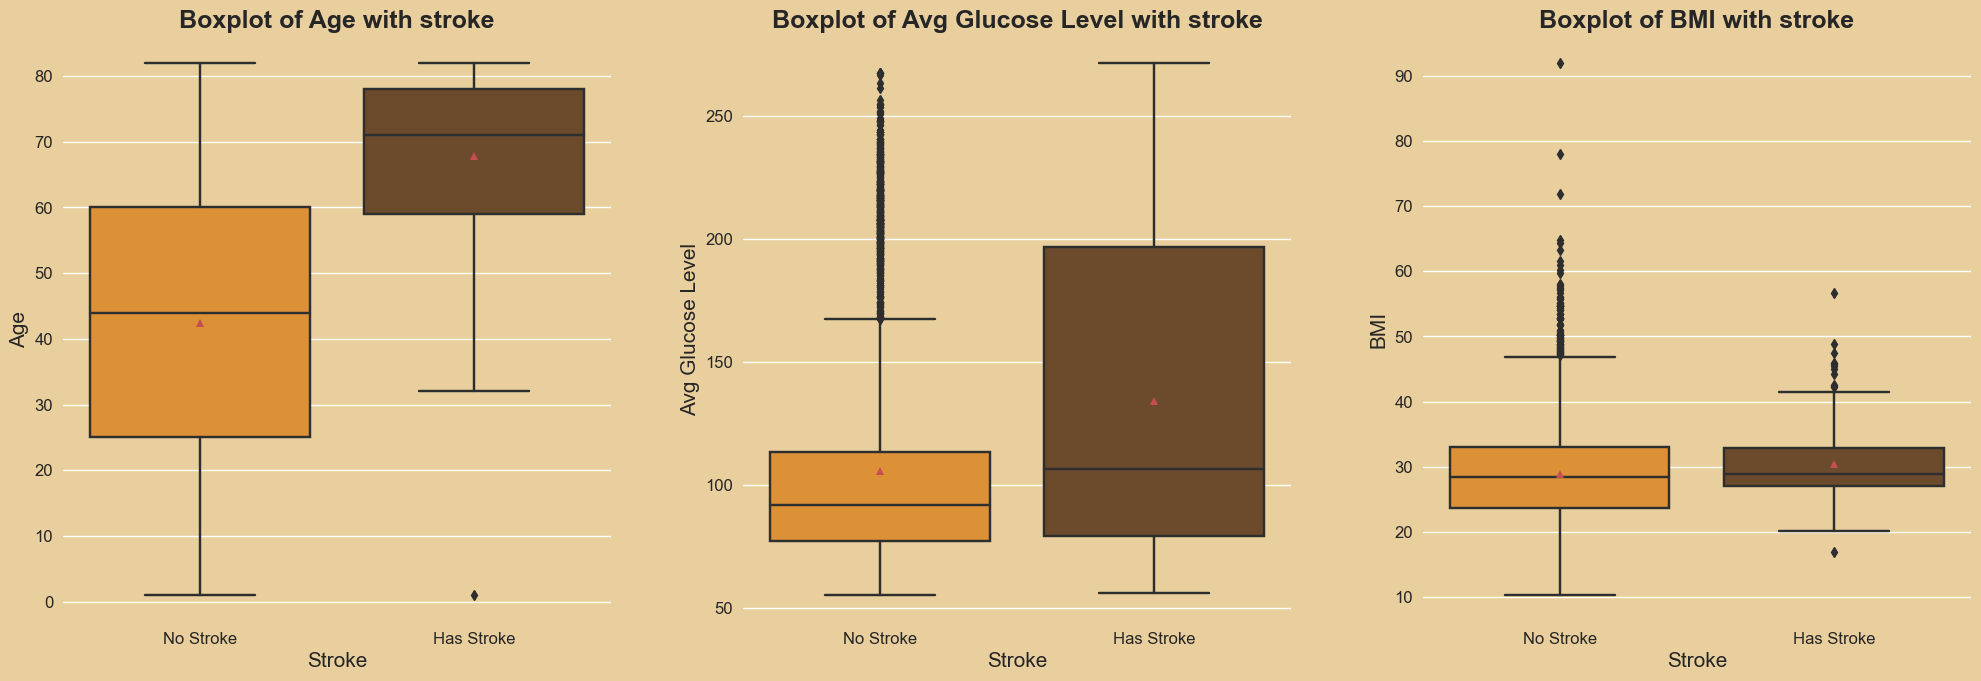

In [276]:
cols = ['age','avg_glucose_level','bmi']
name_cols = ['Age','Avg Glucose Level','BMI']
fig, axs = plt.subplots(1, 3, figsize=(21, 8), facecolor="#E9CF9D")
for idx, col in enumerate(cols):
    axs[idx] = sns.boxplot(x='stroke', y=col, data=stroke_Final, showmeans=True,
                           ax=axs[idx], palette=["#F7941C", "#764A23"])
    axs[idx].set_facecolor('#E9CF9D')
    axs[idx].set_title(f'Boxplot of {name_cols[idx]} with stroke', fontsize=18, fontweight='bold')
    axs[idx].set_xlabel('Stroke', fontsize=15)
    axs[idx].set_ylabel(f'{name_cols[idx]}', fontsize=15)
    axs[idx].set_xticklabels(['No Stroke', 'Has Stroke'], fontsize=12)
    axs[idx].tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout(pad=5.0)
plt.savefig('boxplots.png', bbox_inches='tight')
plt.show()

- Although the BMI column has a lot of outliers, the average BMI of people who have a stroke and the average BMI of people who do not have a stroke are not much different.

- The average glucose level of people who have a stroke is higher than the average glucose level of people who do not have a stroke.

- The average age of people who have a stroke is higher than the average age of people who do not have a stroke.

### Hypertension

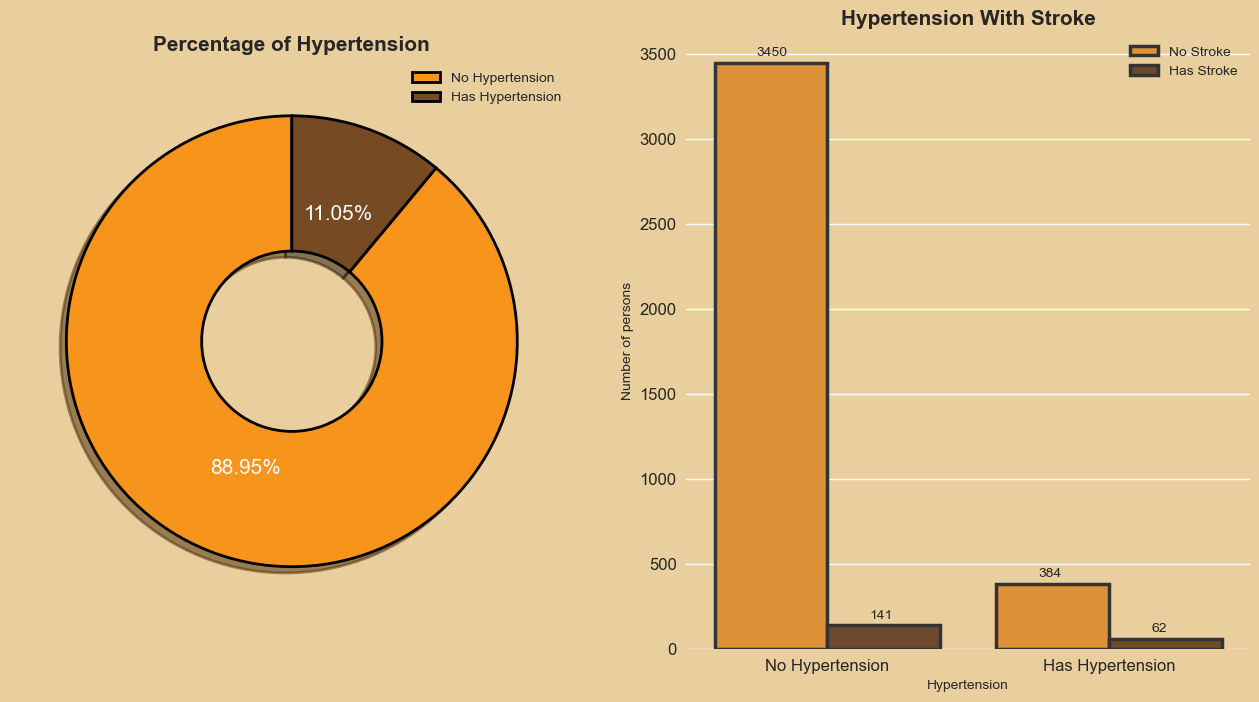

In [277]:
labels = ['No Hypertension', 'Has Hypertension']
Object={0:"No Hypertension",1:"Has Hypertension"}
fig, axs = plt.subplots(1, 2, figsize = (16,8), facecolor='#E9CF9D')
axs[0].pie(stroke_Final["hypertension"].value_counts(),autopct='%1.2f%%',labels=labels,radius =1, 
           colors=["#F7941C", "#764A23"], shadow = True, startangle = 90, labeldistance=None,
           wedgeprops = {"edgecolor" : "black",
                         'linewidth': 2,
                         'antialiased': True,
                         "width":0.6}, textprops = {"fontsize":15, "color":"white"})
axs[0].set_title("Percentage of Hypertension",fontsize=15,fontweight="bold")
axs[0].set_facecolor('#E9CF9D')
axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[0].legend()

stroke_Final["Has_No_Hypertension"]=stroke_Final['hypertension']
stroke_Final['Has_No_Hypertension']=stroke_Final['Has_No_Hypertension'].map(Object)
axs[1]=sns.countplot(x='Has_No_Hypertension', data=stroke_Final, hue=stroke_Final['stroke'], edgecolor='0.2', 
                     lw=2.5, palette=["#F7941C", "#764A23"])
axs[1].set_facecolor('#E9CF9D')
[axs[1].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+40)) for p in axs[1].patches]
axs[1].set_xlabel('Hypertension', fontsize=10)
axs[1].set_ylabel('Number of persons',fontsize=10)
axs[1].legend(['No Stroke','Has Stroke'])
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].set_title("Hypertension With Stroke",fontsize=15, fontweight="bold")
plt.savefig('hypertension.png', bbox_inches='tight')
plt.show()

The chance of getting a stroke is higher if you have hypertension.

### Heart_disease

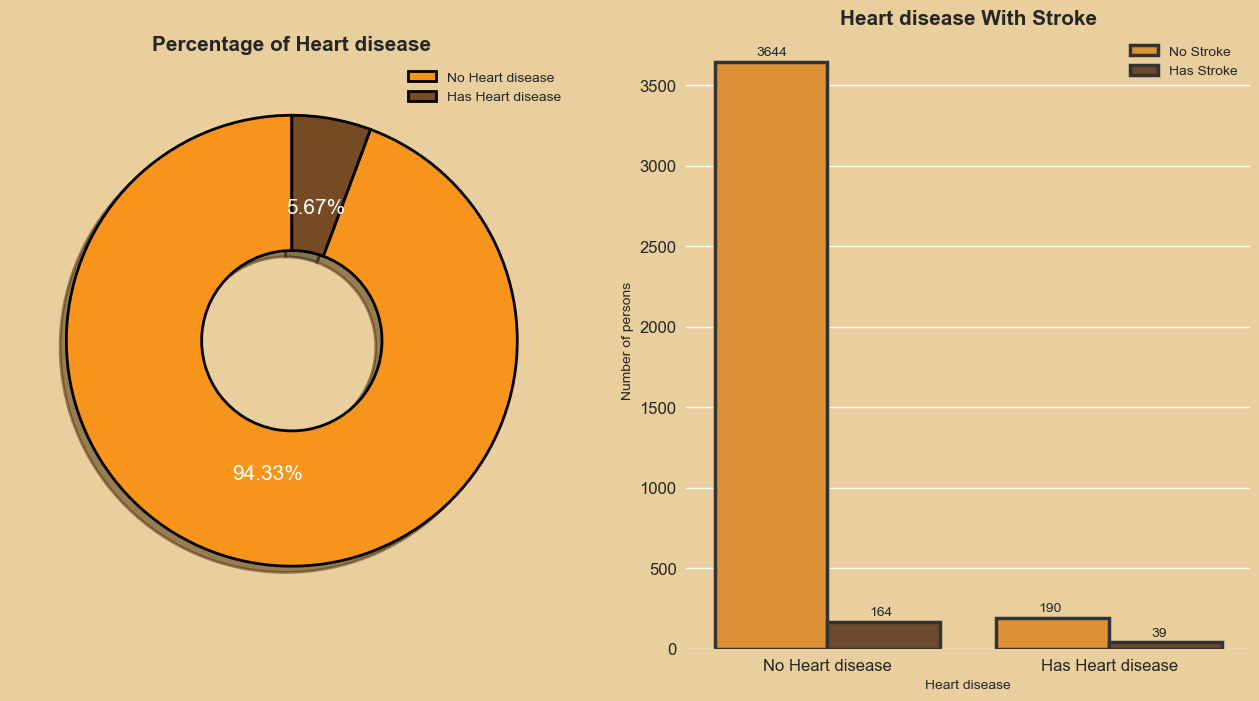

In [278]:
labels = ['No Heart disease', 'Has Heart disease']
Object={0:"No Heart disease",1:"Has Heart disease"}
fig, axs = plt.subplots(1, 2, figsize = (16,8), facecolor='#E9CF9D')
axs[0].pie(stroke_Final["heart_disease"].value_counts(),autopct='%1.2f%%', labels=labels, radius =1,
           colors=[ "#F7941C", "#764A23"], shadow = True, startangle = 90, labeldistance=None,
           wedgeprops = {"edgecolor" : "black",
                       'linewidth': 2,
                       'antialiased': True,
                       "width":0.6}, textprops = {"fontsize":15, "color":"white"})
axs[0].set_title("Percentage of Heart disease",fontsize=15,fontweight="bold")
axs[0].set_facecolor('#E9CF9D')
axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[0].legend()

stroke_Final["Has_No_Heart_disease"]=stroke_Final['heart_disease']
stroke_Final['Has_No_Heart_disease']=stroke_Final['Has_No_Heart_disease'].map(Object)
axs[1]=sns.countplot(x='Has_No_Heart_disease', data=stroke_Final, hue =stroke_Final['stroke'], 
                     edgecolor='0.2', lw=2.5,  palette=["#F7941C", "#764A23"])
axs[1].set_facecolor('#E9CF9D')
[axs[1].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+40)) for p in axs[1].patches]
axs[1].set_xlabel('Heart disease', fontsize=10)
axs[1].set_ylabel('Number of persons',fontsize=10)
axs[1].legend(['No Stroke','Has Stroke'])
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].set_title("Heart disease With Stroke",fontsize=15, fontweight="bold")
plt.savefig('heart_disease.png', bbox_inches='tight')
plt.show()

The chance of getting a stroke is also higher if you have heart disease.

### Ever married

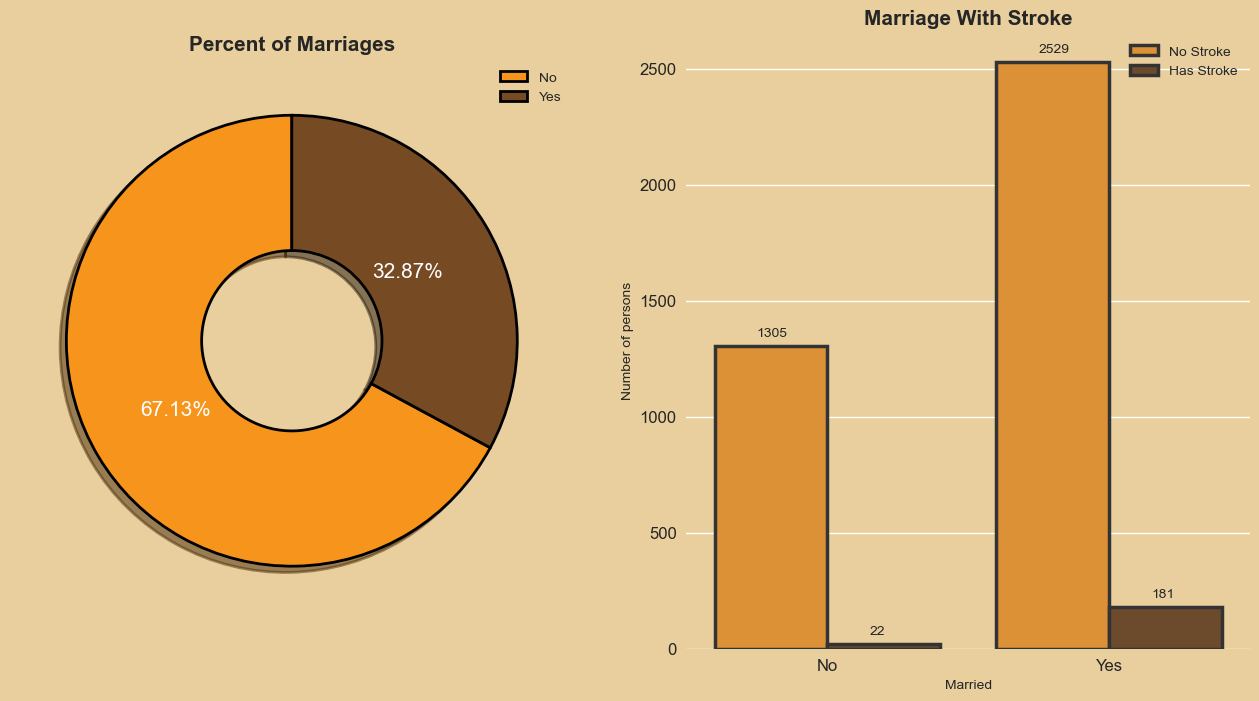

In [279]:
labels = ['No', 'Yes']
fig, axs = plt.subplots(1, 2, figsize = (16,8), facecolor='#E9CF9D')
axs[0].pie(stroke_Final["ever_married"].value_counts(),autopct='%1.2f%%',labels=labels, radius =1, 
           colors=["#F7941C", "#764A23"], shadow = True, startangle = 90, labeldistance=None,
           wedgeprops = {"edgecolor" : "black",
                         'linewidth': 2,
                         'antialiased': True,
                         "width":0.6}, textprops = {"fontsize":15, "color":"white"})
axs[0].set_title("Percent of Marriages",fontsize=15,fontweight="bold")
axs[0].set_facecolor('#E9CF9D')
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[0].legend()

axs[1] = sns.countplot(x='ever_married', data=stroke_Final, hue =stroke_Final['stroke'], edgecolor='0.2', 
                       lw=2.5, palette=["#F7941C", "#764A23"])
axs[1].set_facecolor('#E9CF9D')
[axs[1].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+40)) for p in axs[1].patches]
axs[1].set_xlabel('Married', fontsize=10)
axs[1].set_ylabel('Number of persons',fontsize=10)
axs[1].legend(['No Stroke','Has Stroke'])
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].set_title("Marriage With Stroke",fontsize=15, fontweight="bold")
plt.savefig('ever_married.png', bbox_inches='tight')
plt.show()

It's look like the chance of getting a stroke is higher if you have ever married.

### Work_type

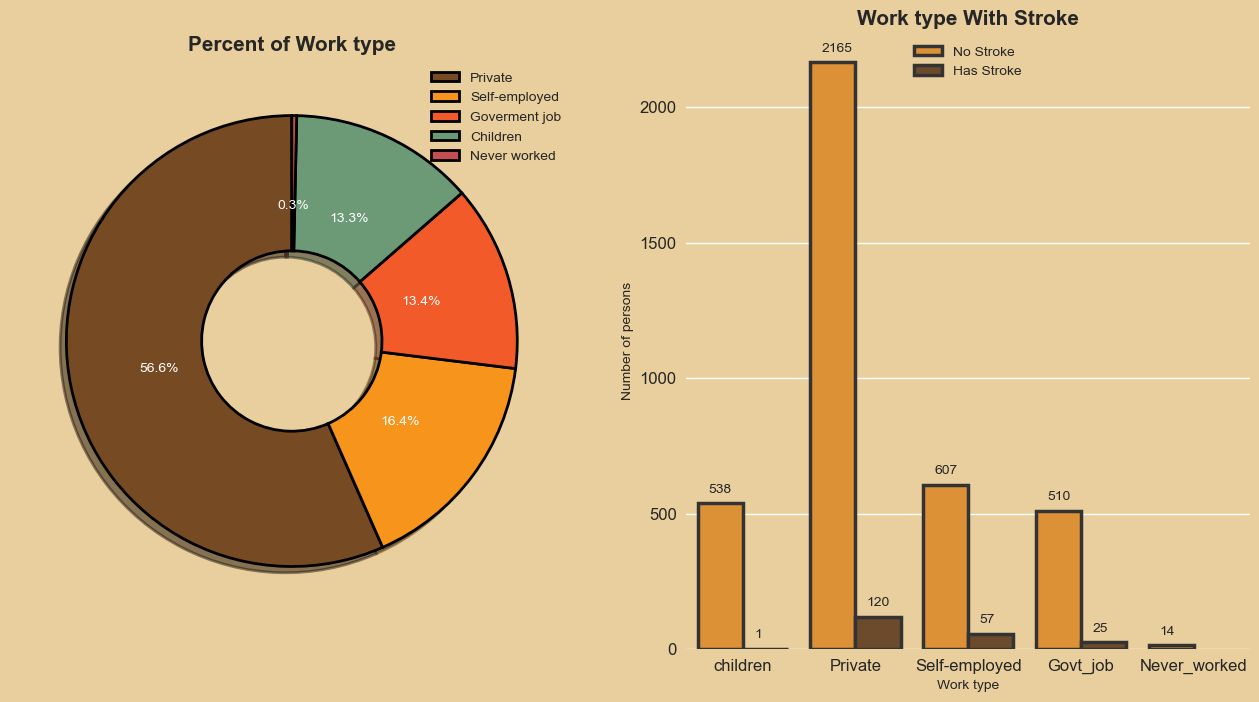

In [280]:
labels = ['Private', 'Self-employed', 'Goverment job', 'Children','Never worked']
fig, axs = plt.subplots(1, 2, figsize = (16,8), facecolor='#E9CF9D')
axs[0].pie(stroke_Final["work_type"].value_counts(),labels=labels, autopct='%1.1f%%',radius =1,
           colors=[ "#764A23", "#F7941C","#F25A29","#6C9A76", "#C44F52"], shadow = True, startangle = 90,    labeldistance=None,
           wedgeprops = {"edgecolor" : "black",
                   'linewidth': 2,
                   'antialiased': True,
                   "width":0.6}, textprops = {"color":"white"})
axs[0].set_title("Percent of Work type",fontsize=15,fontweight="bold")
axs[0].set_facecolor('#E9CF9D')
axs[0].legend()
axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[1] = sns.countplot(x='work_type', data=stroke_Final, hue =stroke_Final['stroke'], edgecolor='0.2', lw=2.5,  
                       palette=["#F7941C", "#764A23"])
axs[1].set_facecolor('#E9CF9D')
[axs[1].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+40)) for p in axs[1].patches]
axs[1].set_xlabel('Work type', fontsize=10)
axs[1].set_ylabel('Number of persons',fontsize=10)
axs[1].legend(['No Stroke','Has Stroke'])
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].set_title("Work type With Stroke",fontsize=15, fontweight="bold")
plt.savefig('work_type.png', bbox_inches='tight')
plt.show()

The people who have a stroke are mostly private workers. This might be changed if we have more data.

### Residence_type

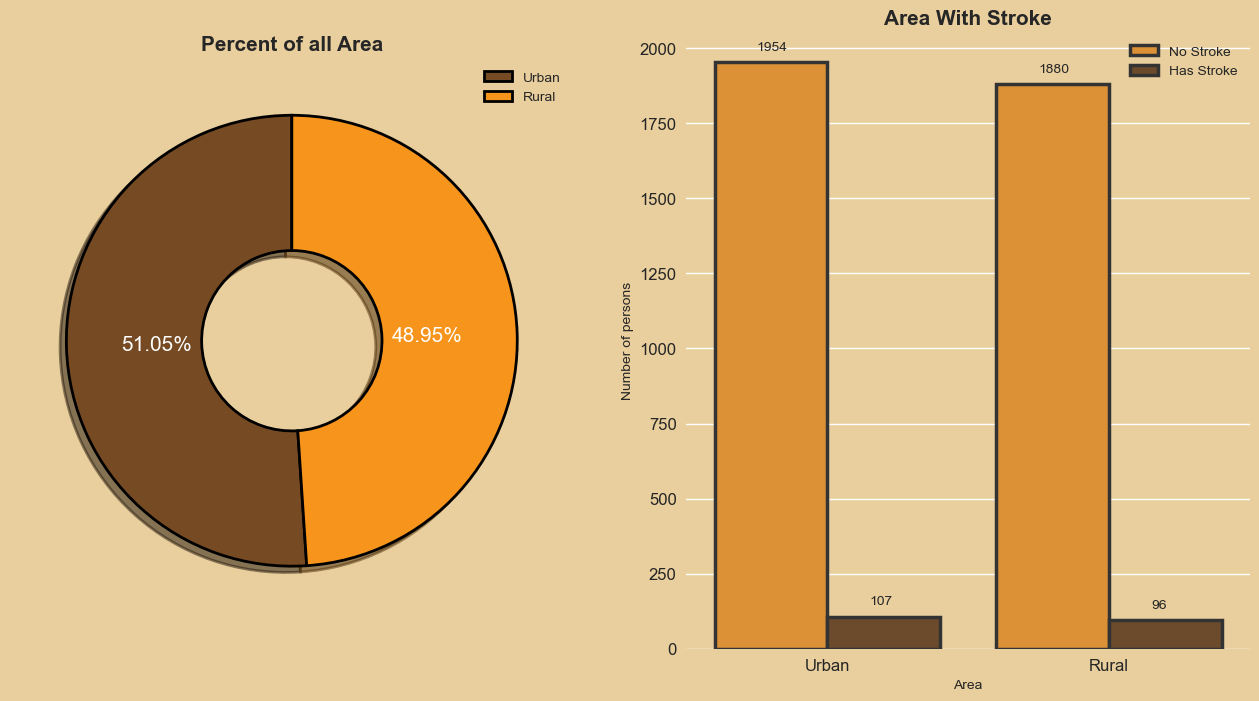

In [281]:
labels = ['Urban', 'Rural']
fig, axs = plt.subplots(1, 2, figsize = (16,8), facecolor='#E9CF9D')
axs[0].pie(stroke_Final["Residence_type"].value_counts(),autopct='%1.2f%%', labels=labels, radius =1,
           colors=["#764A23", "#F7941C"], shadow = True, startangle = 90, labeldistance=None,
           wedgeprops = {"edgecolor" : "black",
                         'linewidth': 2,
                         'antialiased': True,
                         "width":0.6}, textprops = {"fontsize":15, "color":"white"})
axs[0].set_title("Percent of all Area",fontsize=15,fontweight="bold")
axs[0].set_facecolor('#E9CF9D')
axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[0].legend()

axs[1] = sns.countplot(x='Residence_type', data=stroke_Final, hue =stroke_Final['stroke'], edgecolor='0.2', lw=2.5,  palette=["#F7941C", "#764A23"])
axs[1].set_facecolor('#E9CF9D')
[axs[1].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+40)) for p in axs[1].patches]
axs[1].set_xlabel('Area', fontsize=10)
axs[1].set_ylabel('Number of persons',fontsize=10)
axs[1].legend(['No Stroke','Has Stroke'])
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].set_title("Area With Stroke",fontsize=15, fontweight="bold")
plt.savefig('residence_type.png', bbox_inches='tight')
plt.show()

There's not much different about the stroke ratio of each residence type.

### Smoking_status

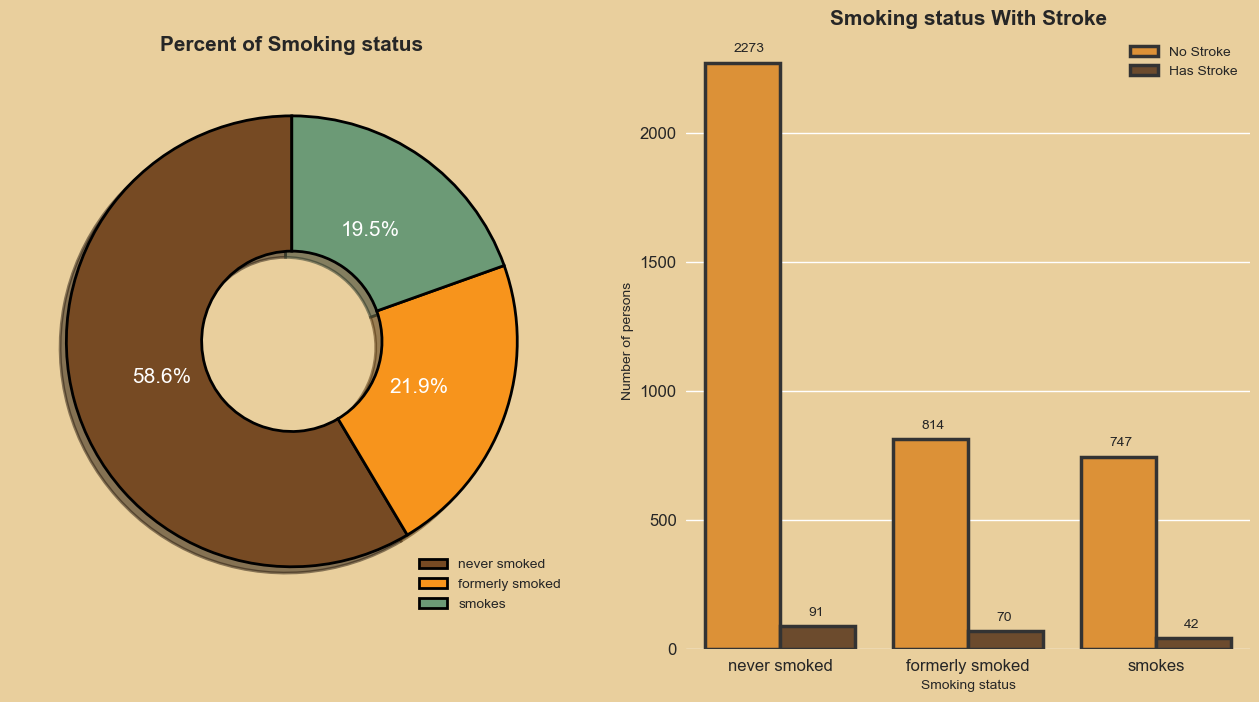

In [282]:
labels = ['never smoked', 'formerly smoked', 'smokes']
fig, axs = plt.subplots(1, 2, figsize = (16,8), facecolor='#E9CF9D')
axs[0].pie(stroke_Final["smoking_status"].value_counts(),labels=labels, autopct='%1.1f%%',radius =1, 
           colors=[ "#764A23", "#F7941C","#6C9A76"], shadow = True, startangle = 90, labeldistance=None,
           wedgeprops = {"edgecolor" : "black",
                         'linewidth': 2,
                         'antialiased': True,
                         "width":0.6}, textprops = {"fontsize": 15, "color":"white"})
axs[0].set_title("Percent of Smoking status",fontsize=15,fontweight="bold")
axs[0].set_facecolor('#E9CF9D')
axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[0].legend()

axs[1] = sns.countplot(x='smoking_status', data=stroke_Final, hue =stroke_Final['stroke'], edgecolor='0.2', lw=2.5,
                       palette=["#F7941C", "#764A23"])
axs[1].set_facecolor('#E9CF9D')
[axs[1].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+40)) for p in axs[1].patches]
axs[1].set_xlabel('Smoking status', fontsize=10)
axs[1].set_ylabel('Number of persons',fontsize=10)
axs[1].legend(['No Stroke','Has Stroke'])
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].set_title("Smoking status With Stroke",fontsize=15, fontweight="bold")
plt.savefig('smoking_status.png', bbox_inches='tight')
plt.show()

There's a higher chance of getting a stroke if you are/were a smoker.

### Correlation matrix

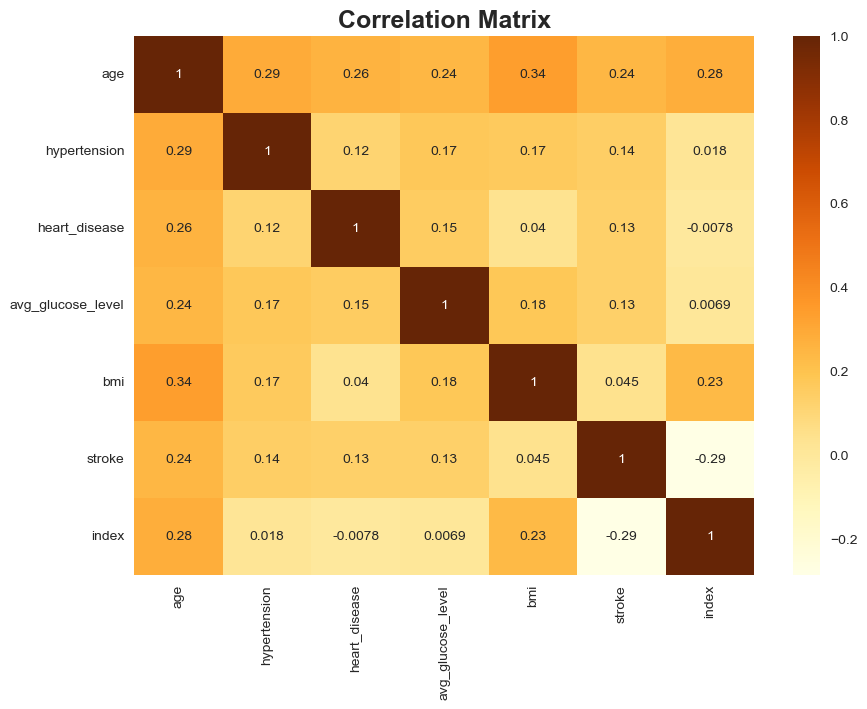

In [283]:
plt.figure(figsize=(10,7))
corrmat = stroke_Final.corr()
colormap=sns.color_palette("YlOrBr", as_cmap=True)
sns.heatmap(data=corrmat,annot=True, cmap=colormap)
plt.title('Correlation Matrix', fontsize=18, fontweight="bold")
plt.yticks(rotation=0)
plt.savefig('correlation.png', bbox_inches='tight')
plt.show()

The correlation between the features is not very high, so we don't need to drop any features.

##
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
# 3. Model Building

First, we will import necessary dependencies for model building.

In [284]:
import scipy.stats as stats
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_predict
from sklearn import metrics, set_config
set_config(display="diagram")

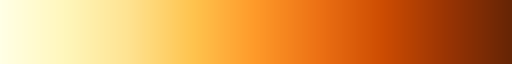

In [285]:
sns.color_palette("YlOrBr", as_cmap=True)

Next, we will define some functions that will be used for model evaluation.

In [286]:
def plot_confusion_matrix(y_true, y_pred, ax):
    if ax is None:
        raise Exception("You must pass an axis object")
    ax.xaxis.grid()
    ax.yaxis.grid()
    cm = metrics.confusion_matrix(y_true, y_pred)
    names = ['True Negative','False Positive','False Negative','True Positive']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, fmt ='', cmap="YlOrBr", ax=ax)
    ax.title.set_text('Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title('Confusion Matrix', fontsize=15, fontweight='bold')

In [287]:
def plot_precision_recall_curve(y_true, y_pred, ax):
    if ax is None:
        raise Exception("You must pass an axis object")
    precision, recall, _ = metrics.precision_recall_curve(y_true, y_pred)
    pr_auc = metrics.auc(recall, precision)
    ax.xaxis.grid()
    ax.yaxis.grid()
    ax.plot(recall, precision, color="#764A23")
    ax.set_facecolor('#E9CF9D')
    ax.title.set_text('Precision-Recall curve')
    ax.legend([f'PR AUC: {pr_auc:.2f}'])
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_title('Precision-Recall Curve', fontsize=15, fontweight='bold')

Then, we will define some machine learning models that will be used for training.

In [288]:
lr = LogisticRegression(random_state=42)
svc = SVC(random_state=42)
sgd = SGDClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
mlp = MLPClassifier()
models = [lr, svc, sgd, dt, mlp]

For each model, we will define hyperparameters that will be used for random search.

In [289]:
lr_params = {
    "penalty": ["l2", "l1", "elasticnet", None],
    "C": np.logspace(-4, 4, 10),
    "l1_ratio": stats.uniform(0, 1),
    "solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}
svc_params = {
    "C": np.logspace(-4, 4, 10),
    "kernel": ["linear", "poly", "sigmoid", "rbf"],
    "degree": list(range(1, 5)),
    "gamma": ["scale", "auto"]
}
sgd_params = {
    "loss": ["modified_huber", "squared_hinge", "perceptron"],
    "learning_rate": ["constant", "optimal", "invscaling", "adaptive"],
    "l1_ratio": stats.uniform(0, 1),
    "eta0": stats.uniform(0, 1)
}
dt_params = {
    "max_depth": list(range(6,10)),
    "max_features" : [2,3,4,"auto","sqrt","log2"],
    "min_samples_leaf": [2,3,4,5],
    "criterion": ["gini", "entropy"]
}
mlp_params = {
    "activation": ["identity", "logistic", "tanh", "relu"],
    "solver": ["lbfgs", "sgd"],
    "learning_rate": ["constant", "invscaling", "adaptive"],
    "learning_rate_init": stats.uniform(0, 1)
}

model_params = [lr_params, svc_params, sgd_params, dt_params, mlp_params]

Now, as all models and parameters are defined, let's load the raw data and do some preprocessing.

- First, we drop the `id` column as it is not required for training.
- Next, we standardize the columns names and all the strings to lower case and have '_' between words instead of spaces. For example: `avg_glucose_level` instead of `avg glucose level`.
- Then, we replace the `children` with `never_worked` value in `work_type` column.
- After that, we convert the `age` column to integers and replace value `1` with `0`.
- Finally, we will remove the rows with incorrect values in `gender` column and `smoking_status` column.

In [290]:
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')
df.drop('id', axis=1, inplace=True)
df.columns = df.columns.str.lower()
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df = df.replace(' ', '_', regex=True).replace('-', '_', regex=True)
df.replace("children", "never_worked", inplace=True)
df['age'] = df['age'].astype('int64')
df[df['age'] == 0]['age'] = 1
df[df['age'] < 10]['smoking_status'] = 'never_smoked'
df_new = df[(df['gender'] != 'other') & (df['smoking_status'] != 'unknown')]

We split `df_new` into `X` and `y`.

In [291]:
X = df_new.drop('stroke', axis=1)
y = df_new['stroke']

We split `X` and `y` into `X_train`, `X_test`, `y_train`, `y_test`. For the training set, we will use `RepeatedStratifiedKFold()` with 3 splits and 10 repeats for the random search.

In [292]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=20)

We define `ColumnTransformer()` named `column_transformer` which is using `SimpleImputer()` combined with `MinMaxSclaer()` for numerical columns and `OneHotEncoder()` for categorical columns.

In [293]:
numerical_indexes = [X.columns.get_loc(c) for c in X.select_dtypes(exclude=['object']).columns.to_list() if c in X]
categorical_indexes = [X.columns.get_loc(c) for c in X.select_dtypes(include=['object']).columns.to_list() if c in X]

column_transformer = ColumnTransformer(
    [
        ('numerical', Pipeline(
            [
                ('imputer', SimpleImputer(strategy='mean')),
                ('scaler', MinMaxScaler())
            ]
        ), numerical_indexes),
        ('categorical', OneHotEncoder(), categorical_indexes)
    ],
    remainder="passthrough"
)

We define `Pipeline()` named `pipeline` which is using:
- `column_transformer` for the transformer.
- `SMOTEENN` for the resampling.
- `model`, which is one of the models we define above, for the classifier.

After that, we use `RandomizedSearchCV()` to find the best hyperparameters which optimize the `f1_weighted` score for each model.

We will plot the confusion matrix and the Precision-Recall curve for each model.

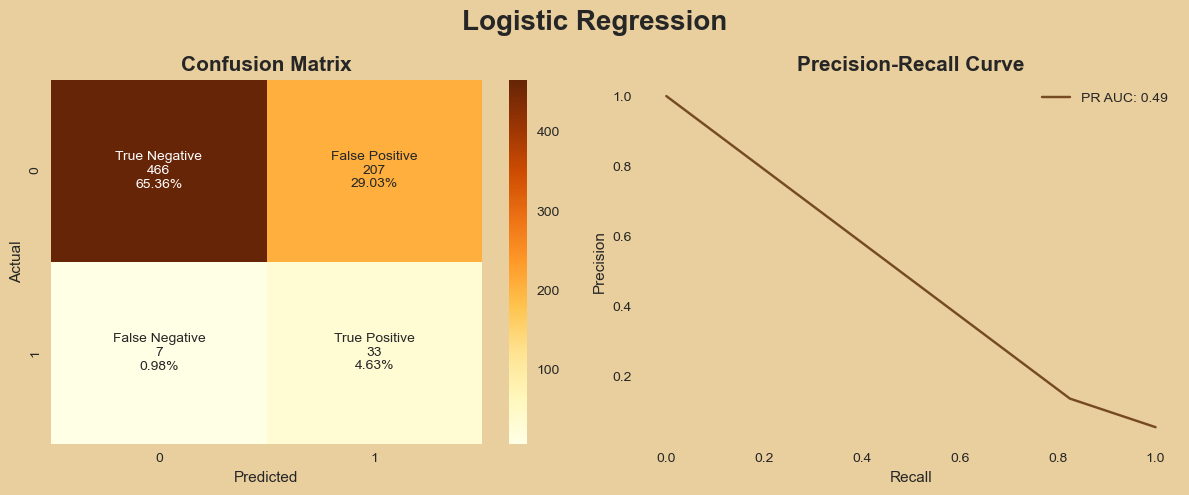

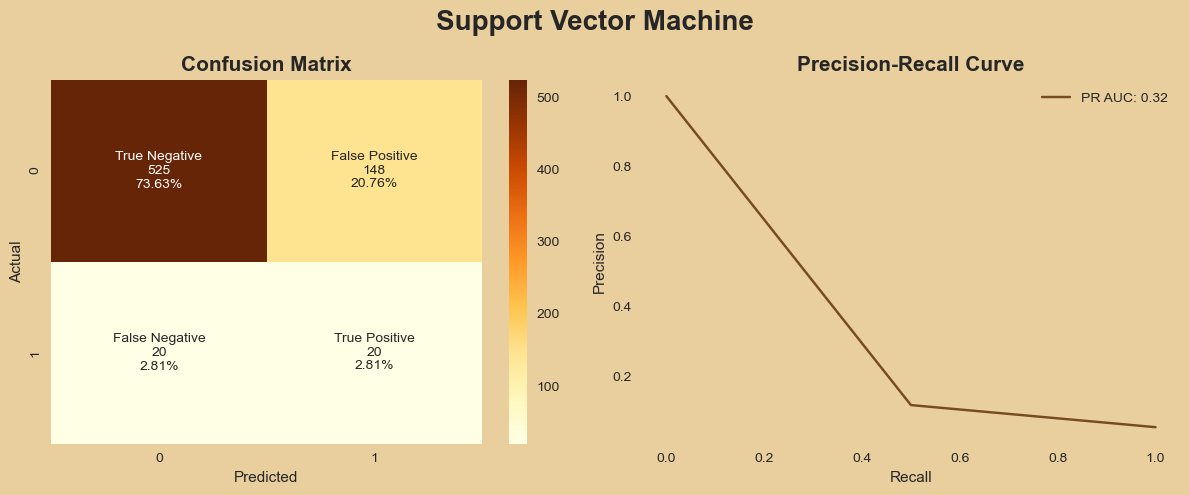

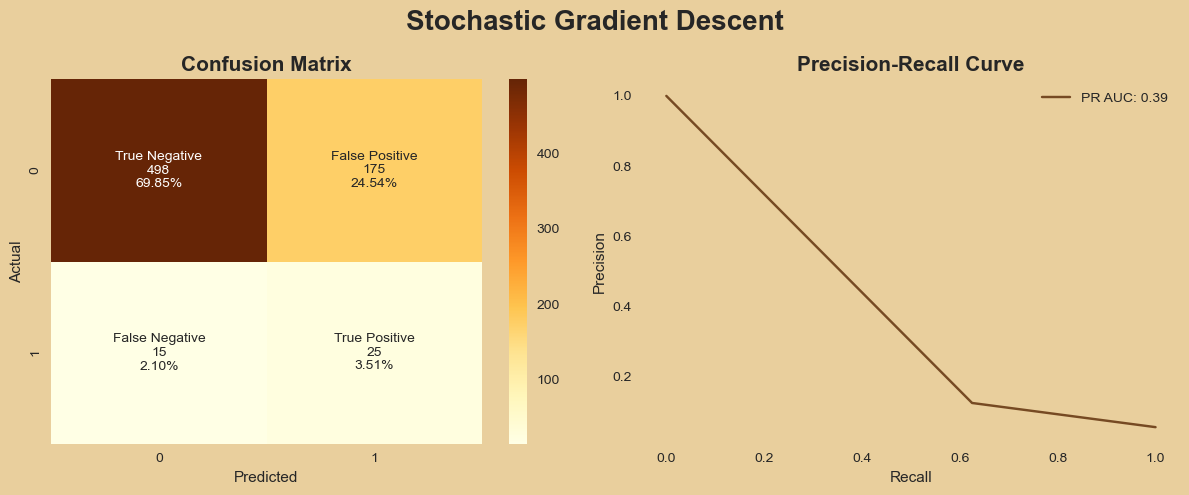

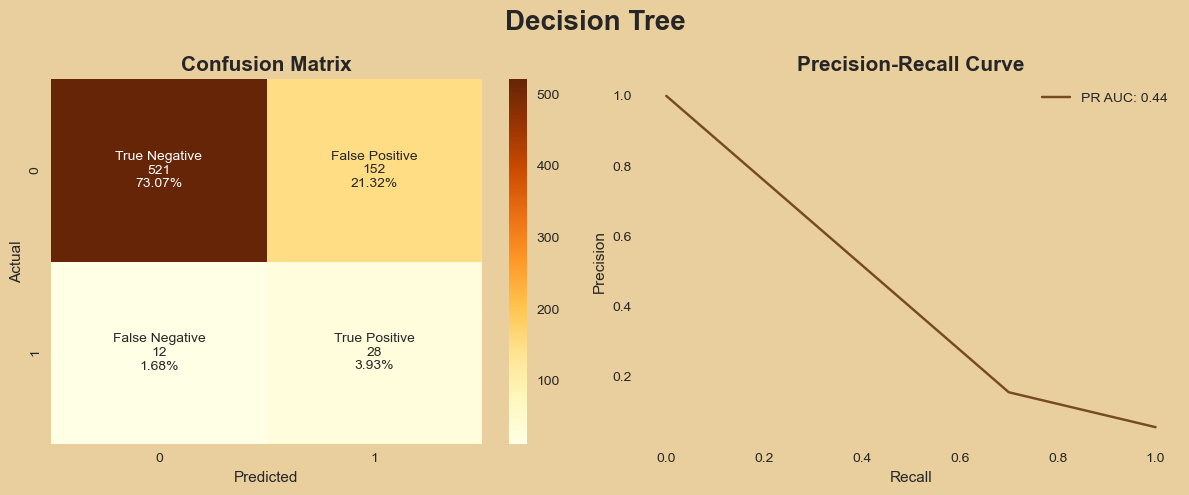

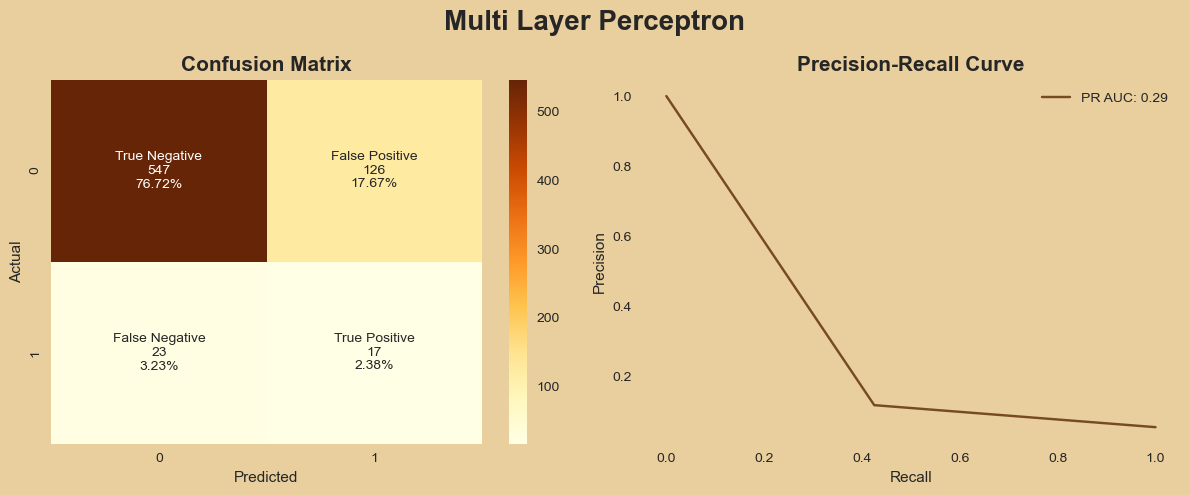

In [294]:
pipelines = []
accuracy_scores = []
precision_weighted_scores = []
recall_weighted_scores = []
f1_weighted_scores = []
model_names = ['Logistic Regression', 'Support Vector Machine', 'Stochastic Gradient Descent', 
               'Decision Tree', 'Multi Layer Perceptron']

for idx, (model, model_param) in enumerate(zip(models, model_params)):
    imba_pipeline = Pipeline([
        ("preprocessing", column_transformer),
        ("sampling", SMOTEENN(random_state=50)),
        ("model", model)
    ])
    new_param = {'model__' + key: model_param[key] for key in model_param}
    random_imba = RandomizedSearchCV(imba_pipeline, new_param, refit=True, cv=cv, 
                                     scoring='f1_weighted', n_jobs=-1, random_state=25)
    random_imba.fit(X_train, y_train)
    y_pred = random_imba.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, y_pred))
    precision_weighted_scores.append(metrics.precision_score(y_test, y_pred, average='weighted'))
    recall_weighted_scores.append(metrics.recall_score(y_test, y_pred, average='weighted'))
    f1_weighted_scores.append(metrics.f1_score(y_test, y_pred, average='weighted'))
    pipelines.append(random_imba)
    fig, axs = plt.subplots(1, 2, figsize=(12, 5), facecolor='#E9CF9D')
    plot_confusion_matrix(y_test, y_pred, axs[0])
    plot_precision_recall_curve(y_test, y_pred, axs[1])
    plt.suptitle(model_names[idx], fontsize=20, fontweight='bold')
    plt.tight_layout()
    plt.savefig(f"{type(model).__name__}.png")
    plt.show()

We also make a table to compare performance for each model.

In [295]:
report_dict = {
    "Model": model_names,
    "Accuracy": accuracy_scores,
    "Weighted Precision": precision_weighted_scores,
    "Weighted Recall": recall_weighted_scores,
    "Weighted F1": f1_weighted_scores
}
report = pd.DataFrame(report_dict, index=[i for i in range(1, len(models)+1)])
report

,Model,Accuracy,Weighted Precision,Weighted Recall,Weighted F1
1,Logistic Regression,0.700,0.938,0.700,0.781
2,Support Vector Machine,0.764,0.916,0.764,0.824
3,Stochastic Gradient Descent,0.734,0.923,0.734,0.804
4,Decision Tree,0.770,0.931,0.770,0.830
5,Multi Layer Perceptron,0.791,0.912,0.791,0.841


Because the weighted F1 score of `MLPClassifier()` is the highest, we will use it for the final model.

In [296]:
best_pipeline = pipelines[f1_weighted_scores.index(max(f1_weighted_scores))]
best_pipeline

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=20),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('numerical',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                MinMaxScaler())]),
                                                                               [1,
                                                                                2,
                                                                                3,
                                                                                7,
                                                                                8]),
                                                                              ('categorical',
                                                                               OneHotEncoder(),
                                                                               [0,
                                                                                4,
                                                                                5,
                                                                                6,
                                                                                9])])),
                                             ('sampling',
                                              SMOTEEN...),
                                             ('model', MLPClassifier())]),
                   n_jobs=-1,
                   param_distributions={'model__activation': ['identity',
                                                              'logistic',
                                                              'tanh', 'relu'],
                                        'model__learning_rate': ['constant',
                                                                 'invscaling',
                                                                 'adaptive'],
                                        'model__learning_rate_init': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021AE3E6FE50>,
                                        'model__solver': ['lbfgs', 'sgd']},
                   random_state=25, scoring='f1_weighted')

We pickle the pipeline in `model.pkl` file and we will use that for the web application.

In [297]:
file_name = 'pipeline.pkl'
joblib.dump(best_pipeline, file_name)

['pipeline.pkl']